In [2]:
%load_ext autoreload
%autoreload 2
%run ../draw_functions.py
%run ../kstest.py

In [3]:
from draw_functions import *
from kstest import *

In [4]:
#read csv
df = pd.read_csv('../csv/MX32401191IL01.csv')

#ajout du slope
df['slope'] = df.groupby('ResultCurve_id').apply(lambda group: group['xvalue'].diff() / group['xtime'].diff(), include_groups=False).reset_index(level=0, drop=True)
df_02_08 = df[(df['xtime'] >= 0.2) & (df['xtime'] <= 0.8)]
df_035_065 = df[(df['xtime'] >= 0.35) & (df['xtime'] <= 0.65)]
df

,ResultCurve_id,xtime,xvalue,Batch,Sample_Code,slope
0,EC88FAD9-BB92-4E48-B15B-07A788A6C3DF,0.016667,1.920745,015801D,OI107QO0,NaN
1,EC88FAD9-BB92-4E48-B15B-07A788A6C3DF,0.026667,1.785163,015801D,OI107QO0,-13.558201
2,EC88FAD9-BB92-4E48-B15B-07A788A6C3DF,0.036667,1.672178,015801D,OI107QO0,-11.298501
3,EC88FAD9-BB92-4E48-B15B-07A788A6C3DF,0.039867,1.664947,015801D,OI107QO0,-2.259700
4,EC88FAD9-BB92-4E48-B15B-07A788A6C3DF,0.046667,1.649581,015801D,OI107QO0,-2.259700
...,...,...,...,...,...,...
2572,4591DC4B-6707-4DBA-85E4-FEA9E0BC3262,0.931667,9.253472,020302D,OI10ASMY,1.129850
2573,4591DC4B-6707-4DBA-85E4-FEA9E0BC3262,0.941667,9.230875,020302D,OI10ASMY,-2.259700
2574,4591DC4B-6707-4DBA-85E4-FEA9E0BC3262,0.951667,9.208278,020302D,OI10ASMY,-2.259700
2575,4591DC4B-6707-4DBA-85E4-FEA9E0BC3262,0.952000,9.208278,020302D,OI10ASMY,0.000000


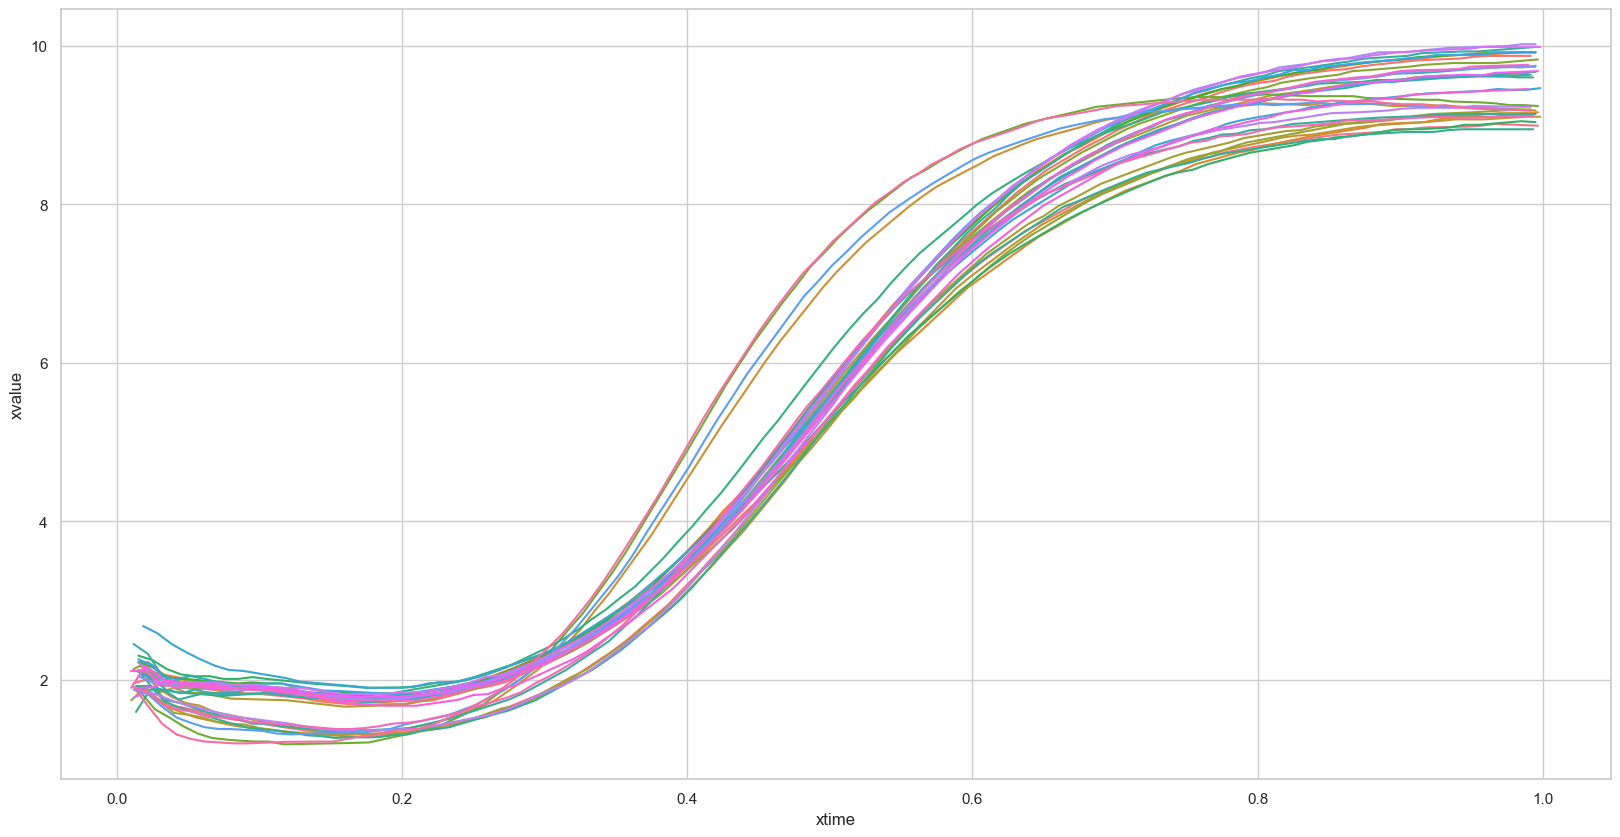

In [4]:
dessiner_commande(df)

## Analyse des pentes

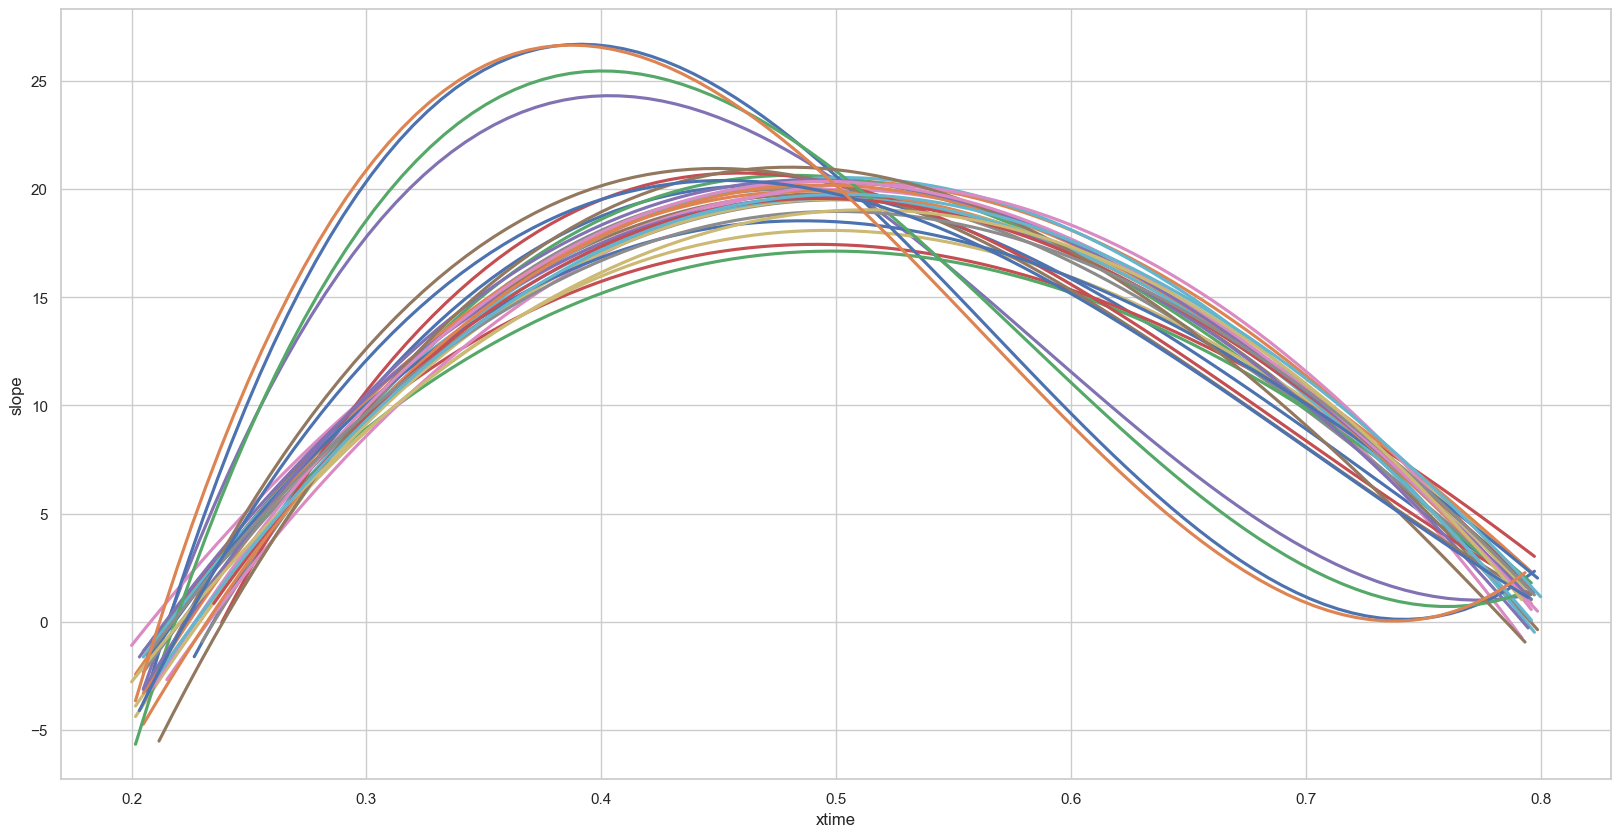

In [4]:
dessiner_commande_slope(df_02_08, 3, unified=False)

<Axes: xlabel='xtime', ylabel='xvalue_diff'>

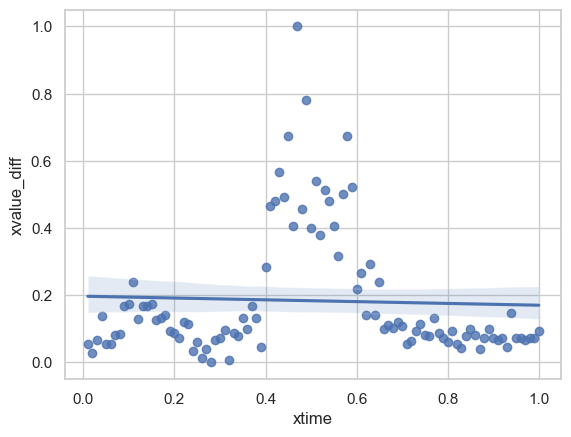

In [66]:
# Plot the max differences
sns.regplot(x='xtime', y='xvalue_diff', data=df_max_diff, scatter=True)

In [8]:
for sample in df_02_08['Sample_Code'].unique():
    df_sample = df_02_08[df_02_08['Sample_Code'] == sample]

    z1 = np.polyfit(df_sample['xtime'], df_sample['slope'], 3)
    p1 = np.poly1d(z1)

    # Update the 'fitted_slope' in df_data for the current sample
    df_02_08.loc[df_02_08['Sample_Code'] == sample, 'fitted_slope'] = p1(df_sample['xtime'])
max_slope_sample_xtime = df_02_08.loc[df_02_08.groupby('Sample_Code')['fitted_slope'].idxmax()][['Batch', 'xtime']].set_index('Batch')['xtime']
max_slope_sample_xtime

Batch
022203D    0.463333
022203D    0.500714
022203D    0.508167
022203D    0.505000
022203D    0.508000
022203D    0.501667
022203D    0.512222
022804D    0.479200
022804D    0.496667
022804D    0.506750
022804D    0.485000
022804D    0.505000
022804D    0.501667
022804D    0.510000
023405D    0.514800
023405D    0.498333
023405D    0.512917
023405D    0.477600
023405D    0.485000
023405D    0.505000
023405D    0.513095
015801D    0.493333
015801D    0.476000
015801D    0.475200
015801D    0.488333
015801D    0.478400
015801D    0.437800
020302D    0.453333
020302D    0.401667
020302D    0.381667
020302D    0.398667
020302D    0.398000
Name: xtime, dtype: float64

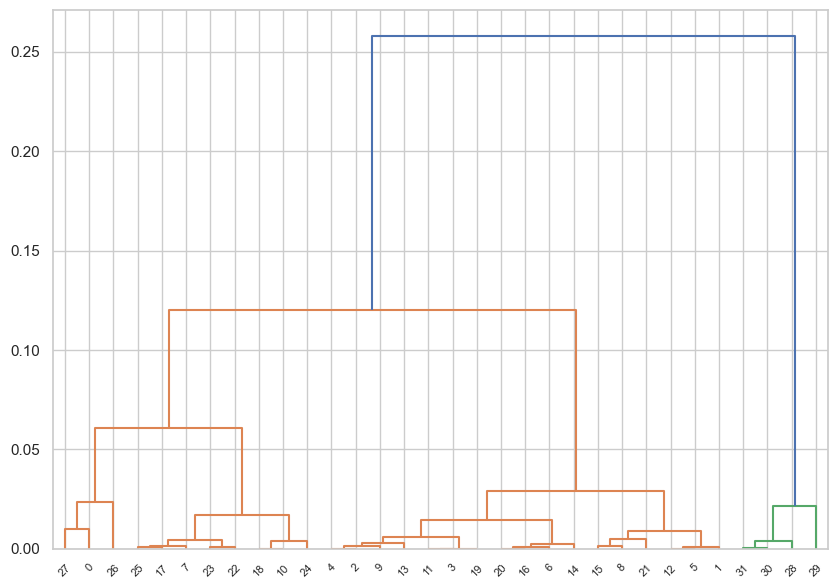

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Reshape your data to a 2D array
data = np.array(max_slope_sample_xtime).reshape(-1, 1)

# Generate the links between the clusters
linked = linkage(data, 'ward')

# Create a new plot
plt.figure(figsize=(10, 7))

# Draw the dendrogram
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)

# Show the plot
plt.show()

In [20]:
from utils import df_distance, distance

# Find the xtime corresponding to the max slope for each group

max_slope_sample_xtime = df_02_08.loc[df_02_08.groupby('Sample_Code')['fitted_slope'].idxmax()][['Batch', 'xtime']].set_index('Batch')['xtime']
dist = distance(max_slope_sample_xtime)*100

dist

5.81999803426182